# Tox 21

The main goal of Tox21 is to develop better toxicity assessment methods that use high-throughput screening and computational methods to replace traditional animal testing.

In the assay they use thousands of chemicals to test their interaction with a wide range of biological targets using high-throughput assays. Focuses on understanding how chemicals affect biological pathways relevant to disease or adverse outcomes.

→ Common use of the dataset (Task):  
- Focus on **understanding chemical toxicity** at a systemic level, including **effects on various biological pathways**.
- Data is often used for risk assessment and regulatory decision-making.
- We will focus on the toxocity pathwa : NR signaling , by retrieving assay readout 

## The files

- *Tox21_assay_list.xltx* : Exhaustive list of assay conducted on NR. A total of 38 assay are conducted on NR 
- *tox21_10k_library_info.xls* : List of compouds tested in the assay with their CID and CAS identifier, unified identifier for 
- *Tox21Assay_SLPs and Descriptoons_2016* : 38 assay compressed, each folder have 4 files, we are interested in concatenating the __.aggregated.txt__ files into one csv file

- Known target toward NR ; AR, ERα, FXR, PPARδ, PPARγ, RXR, TRβ, VDR, GR, hPXR, AhR, rPXR, CAR, ERR

## Import Libraries

In [1]:
import re
import sys
import warnings
import glob , os
import pandas as pd

## Load the files

In [2]:
assay_list = pd.read_excel('../Data_reviewed/Tox21/Tox21_assay_list.xltx')
assay_list.head()


,Protocol Name,Assay Target,Target Category,Cell Line,Cell Type
0,tox21-ache-p3,AChE (colormetric),Neurotoxicity,SH-SY5Y,Neuroblast
1,tox21-ache-p4,AChE (fluorescent),Neurotoxicity,SH-SY5Y,Neuroblast
2,tox21-ache-p5,AChE,Neurotoxicity,NaN,Biochemical
3,tox21-ahr-p1,AhR,NR,HepG2,Liver
4,tox21-ap1-agonist-p1,AP-1 agonist,SR,ME-180,Cervical Cancer


In [3]:
assay_list_nr = assay_list[assay_list['Target Category'] == 'NR']
print(f'There are {len(assay_list_nr)} NR different assays in the Tox21 dataset')
assay_list_nr

There are 38 NR different assays in the Tox21 dataset


,Protocol Name,Assay Target,Target Category,Cell Line,Cell Type
3,tox21-ahr-p1,AhR,NR,HepG2,Liver
5,tox21-ar-bla-agonist-p1,AR-BLA agonist,NR,HEK293,Kidney
6,tox21-ar-bla-antagonist-p1,AR-BLA antagonist,NR,HEK293,Kidney
7,tox21-ar-mda-kb2-luc-agonist-p1,AR-MDA agonist,NR,MDA-MB-453,Breast Cancer
8,tox21-ar-mda-kb2-luc-agonist-p3,AR-MDA agonist (with antagonist),NR,MDA-MB-453,Breast Cancer
9,tox21-ar-mda-kb2-luc-antagonist-p1,AR-MDA antagonist,NR,MDA-MB-453,Breast Cancer
10,tox21-ar-mda-kb2-luc-antagonist-p2,AR-MDA antagonist (lower agonist),NR,MDA-MB-453,Breast Cancer
13,tox21-car-agonist-p1,CAR agonist,NR,HepG2,Liver
14,tox21-car-antagonist-p1,CAR antagonist,NR,HepG2,Liver
19,tox21-er-bla-agonist-p2,ER-BLA agonist,NR,HEK293,Kidney


In [4]:
receptor =  assay_list_nr['Protocol Name'].str.replace(r'[\xa0]','', regex=True).str.split('-').str[1]
receptor = list(set(receptor))
print(f'There are {len(receptor)} different NR receptors tested in the Tox21 dataset')

There are 18 different NR receptors tested in the Tox21 dataset


We will only retain the protocols conducted under the same assay readout, specifically the BLA (b-lactamase) reporter gene assay. Different assay readouts are as follows:

- **Luminescence**: e.g., AR-MDA_TOX21_SLP_Version1.0 (non-receptor signaling)
- **Luciferase Reporter**: e.g., tox21-ahr-p1 (Aryl Hydrocarbon Receptor (AhR)); CAR1_TOX21_SLP_Version1.0

Please note that the assay version **Version1.0** is indicated as **-p1** in the assay name.

In [5]:
blactamase_assay = []

for assay in assay_list_nr['Protocol Name']:

    if assay.split('-')[2] == 'bla' or (len(assay.split('-')) > 3 and assay.split('-')[3] == 'bla'):
        blactamase_assay.append(assay)

unique_receptors = list(set(item.split('-')[1] for item in blactamase_assay))

# Print the results
print(f"There are {len(blactamase_assay)} BLA assays for {len(unique_receptors)} unique receptors, namely {unique_receptors}.")

There are 19 BLA assays for 10 unique receptors, namely ['fxr', 'vdr', 'gr', 'rxr', 'erb', 'ar', 'pr', 'er', 'pparg', 'ppard'].


In [6]:
blactamase_assay = [assay.replace('\xa0', '') for assay in blactamase_assay]

We load the library of 10,000 compounds and the Tox21Assay_SLPS assay from 2016, available for download [here](https://clowder.edap-cluster.com/datasets/63602c6de4b04f6bb13dc4d4)

In [7]:
path = ('../Data_reviewed/Tox21/Assay_aggregrated')

In [8]:
all_assay = glob.glob(os.path.join(path, "*.txt"))
non_empty_assays = [pd.read_table(f) for f in all_assay if not pd.read_table(f).empty]
Tox21_assay = pd.concat(non_empty_assays, ignore_index=True)
Tox21_assay.to_csv('../Data_reviewed/Tox21/Tox21_assay_aggregrated.csv', index=False)
print(f"There is {Tox21_assay['CAS'].nunique()} unique compounds in the Tox21 aggegated dataset")

There is 8948 unique compounds in the Tox21 aggegated dataset


In [9]:
library_info = pd.read_csv('../Data_reviewed/Tox21/tox21_10k_library_info.tsv', delimiter='\t')
print(f"There is {library_info['CAS'].nunique()} unique compounds in the Tox21 chemical library dataset")


There is 8947 unique compounds in the Tox21 chemical library dataset


In [10]:
print(f"There are {Tox21_assay['PROTOCOL_NAME'].nunique()} different assays retrieved, not all of directed toward  NR assays.")

There are 32 different assays retrieved, not all of directed toward  NR assays.


- We only keep the assay that are relevant for us , ie, assay toward NR ; AR, ERα, FXR, PPARδ, PPARγ, RXR, TRβ, VDR, GR, hPXR, AhR, rPXR, CAR, ERR

In [11]:
Tox21_assay = Tox21_assay[Tox21_assay['PROTOCOL_NAME'].isin(blactamase_assay)]
print(f"There are {Tox21_assay['PROTOCOL_NAME'].nunique()} BLA readout assays toward NR receptor .")

There are 15 BLA readout assays toward NR receptor .


In [12]:
sorted_protocol_names = sorted(set(Tox21_assay['PROTOCOL_NAME']))
sorted_protocol_names

['tox21-ar-bla-agonist-p1',
 'tox21-ar-bla-antagonist-p1',
 'tox21-er-bla-agonist-p2',
 'tox21-er-bla-antagonist-p1',
 'tox21-fxr-bla-agonist-p2',
 'tox21-fxr-bla-antagonist-p1',
 'tox21-gr-hela-bla-agonist-p1',
 'tox21-gr-hela-bla-antagonist-p1',
 'tox21-ppard-bla-agonist-p1',
 'tox21-ppard-bla-antagonist-p1',
 'tox21-pparg-bla-agonist-p1',
 'tox21-pparg-bla-antagonist-p1',
 'tox21-rxr-bla-agonist-p1',
 'tox21-vdr-bla-agonist-p1',
 'tox21-vdr-bla-antagonist-p1']

In [13]:
Tox21_annotation = Tox21_assay.merge( library_info, on='SAMPLE_ID', how='right')
Tox21_annotation.to_csv('../Data_reviewed/Tox21/Tox21_annotation.csv',index=False)

Load morphology annotation file : 
- See how many compound overlap in BBC047 and Tox21

In [14]:
#profiles = pd.read_table('../pubchem_annotation_morpho.csv')
#profiles.rename(columns={'CID': 'PUBCHEM_CID'}, inplace=True)
#print(f"There are {profiles['PUBCHEM_CID'].nunique()} unique compounds in the profiles dataset")
#print(f'There are {profiles["PUBCHEM_CID"].isin(Tox21_annotation["PUBCHEM_CID"]).sum()} compounds in the BBC047 dataset that are also in the Tox21 library')
#profiles.head(2)



We used PubChem to retrieve the CID for the 30,615 unique substances tested in BBC047. Since CPD_NAME can identify several molecules without considering stereochemistry, we used Metadata_broad_sample to query PubChem for the CID. If this was unsuccessful, we used the SMILES representation. Five molecules were not identified, resulting in 30,397 unique substances. The CID retrieval code in get_assays was last run on 27/10/2024, taking approximately 4 hours.
the outpout is saved under _pubchem_annotation_october.pkl_


In [15]:
annotations_update = pd.read_pickle('../../Morpheus_Flo/data/pubchem_annotation1.pkl')

In [16]:
annotations_update.rename(columns={'CID': 'PUBCHEM_CID'}, inplace=True)
annotations_update.head(5)

,PUBCHEM_CID,CPD_NAMES
0,679,DMSO
1,2122,BRD-A56675431-001-04-0
2,3654103,BRD-A51829654-001-01-4
3,223368,BRD-K04046242-001-03-6
4,3016,BRD-K16508793-001-01-8


In [17]:
print(f"There are {annotations_update['PUBCHEM_CID'].nunique()} unique compounds in the unprocessed profiles dataset")

There are 30397 unique compounds in the unprocessed profiles dataset


In [18]:
print(f'There are {annotations_update["PUBCHEM_CID"].isin(Tox21_annotation["PUBCHEM_CID"]).sum()} compounds in the BBC047 dataset that are also in the Tox21 library')

There are 658 compounds in the BBC047 dataset that are also in the Tox21 library


Now we merge the morphology file and the tox21

In [19]:
BBC047_mol = annotations_update['PUBCHEM_CID'].to_list() # profiles['PUBCHEM_CID'].to_list()
Tox = Tox21_annotation[Tox21_annotation['PUBCHEM_CID'].isin(BBC047_mol)]

In [20]:
print(f"There are {Tox['SAMPLE_DATA_TYPE'].nunique()} sample data types, namely {list(Tox['SAMPLE_DATA_TYPE'].unique())}")

There are 4 sample data types, namely ['activity', 'viability', 'signal', 'control']


We are only interested in the activity

In [21]:
Tox_activity = Tox[Tox['SAMPLE_DATA_TYPE'] == 'activity']

In [22]:
print(f"There are {Tox_activity['SAMPLE_NAME_x'].nunique()} unique sample molecules in the BBC047 dataset tested in Tox21 assays")

There are 651 unique sample molecules in the BBC047 dataset tested in Tox21 assays


In [23]:
Tox_activity.to_csv('../Data_parsed/Tox21_activity_BBC047.csv',index=False)

## Dataset curation ; some descriptive analysis

In [24]:
import plotly.express as px

We first start by counting the number of compound (unique) per assay (unique)

In [25]:
assay_compound = {}
for asssay in Tox_activity['PROTOCOL_NAME'].unique():
    assay_compound[asssay] = Tox_activity[Tox_activity['PROTOCOL_NAME'] == asssay].CAS_x.nunique()

In [26]:
assay_compound

{'tox21-gr-hela-bla-antagonist-p1': 647,
 'tox21-pparg-bla-agonist-p1': 647,
 'tox21-ppard-bla-antagonist-p1': 578,
 'tox21-er-bla-antagonist-p1': 647,
 'tox21-rxr-bla-agonist-p1': 582,
 'tox21-pparg-bla-antagonist-p1': 578,
 'tox21-fxr-bla-antagonist-p1': 578,
 'tox21-fxr-bla-agonist-p2': 578,
 'tox21-vdr-bla-antagonist-p1': 578,
 'tox21-er-bla-agonist-p2': 647,
 'tox21-ar-bla-agonist-p1': 647,
 'tox21-gr-hela-bla-agonist-p1': 647,
 'tox21-vdr-bla-agonist-p1': 578,
 'tox21-ppard-bla-agonist-p1': 578,
 'tox21-ar-bla-antagonist-p1': 647}

In [27]:
assay_compound_df = pd.DataFrame(list(assay_compound.items()), columns=['Assay', 'Compound'])
assay_compound_df = assay_compound_df.sort_values(by='Compound', ascending=True)

In [28]:
fig = px.bar(assay_compound_df, x='Assay', y='Compound', title='Number of compounds tested in each assay')
fig.show()

-  look at all combinations of how sets intersect : using the upsetplot and library we will show the overlap of compound between the assays

In [29]:
import upsetplot
from collections import defaultdict
import matplotlib.pyplot as plt
from upsetplot import UpSet
from upsetplot import UpSet, from_memberships

In [30]:
assay_data = {}
for asssay in blactamase_assay:
    assay_data[asssay] = Tox_activity[Tox_activity['PROTOCOL_NAME'] == asssay].CAS_x.unique().tolist()

there are 15 assays


/Users/flodje_uds/anaconda3/envs/GCC_DL_Endocrinology/lib/python3.9/site-packages/upsetplot/data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/flodje_uds/anaconda3/envs/GCC_DL_Endocrinology/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users

<Figure size 1200x1000 with 0 Axes>

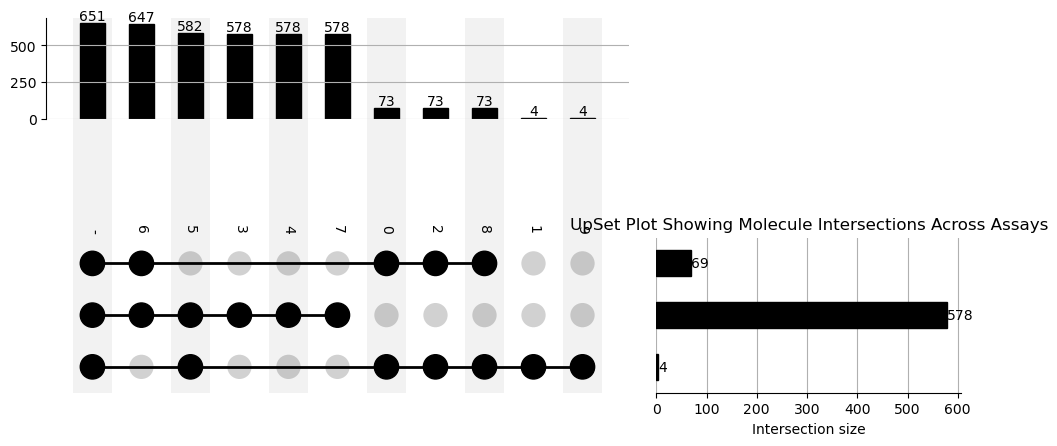

In [31]:


# -  le probleme vient du dataset on ne travaille pas avec Tox_activity['PROTOCOL_NAME'].unique():
assay_data = {}
for assay in Tox_activity['PROTOCOL_NAME'].unique():
    assay_data[assay] = Tox_activity[Tox_activity['PROTOCOL_NAME'] == assay].CAS_x.unique().tolist()
print(f'there are {len(assay_data.keys())} assays')
# Step 1: Create the molecule list
molecules = list(set(mol for mol_list in assay_data.values() for mol in mol_list))  # Convert set to list

# Step 2: Create a DataFrame where rows are molecules, columns are assays, and values indicate presence (1) or absence (0)
df = pd.DataFrame(0, index=molecules, columns=assay_data.keys())
for assay, mol_list in assay_data.items():
    df.loc[mol_list, assay] = 1

# Convert 1/0 to True/False for binary presence/absence
df = df.astype(bool)

# Step 3: Convert the DataFrame into a format suitable for upsetplot
# Using DataFrame directly
upset_data = upsetplot.from_memberships(df.index[df.sum(axis=1)], data=df.sum(axis=1))

# Step 4: Plot the UpSet plot with explicit counts
upset = upsetplot.UpSet(upset_data, show_counts='%d', element_size=50, subset_size='count', orientation='vertical')

# Display the plot
plt.figure(figsize=(12, 10))  # Adjust size as necessary
upset.plot()

plt.title("UpSet Plot Showing Molecule Intersections Across Assays")
plt.show()


/Users/flodje_uds/anaconda3/envs/GCC_DL_Endocrinology/lib/python3.9/site-packages/upsetplot/data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/flodje_uds/anaconda3/envs/GCC_DL_Endocrinology/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users

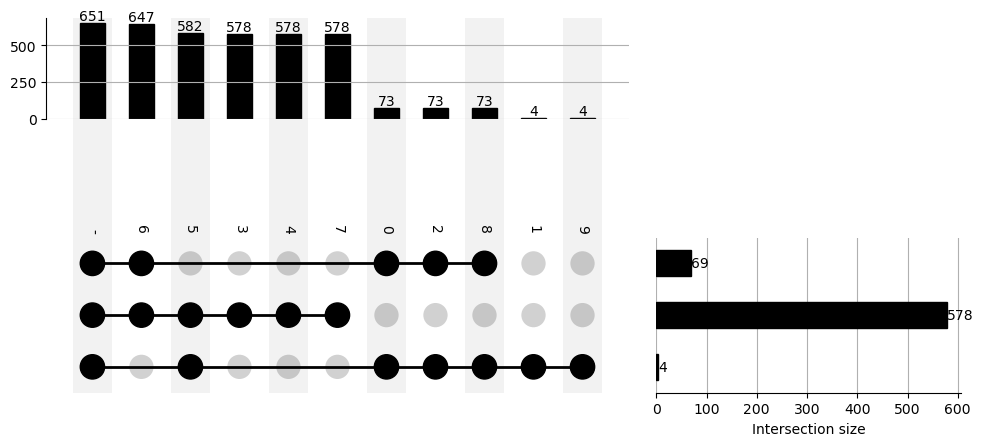

In [32]:

molecules = list(set(mol for mol_list in assay_data.values() for mol in mol_list))  # Convert set to list

# Create a DataFrame where rows are molecules, columns are assays, and values indicate presence (1) or absence (0)
df = pd.DataFrame(0, index=molecules, columns=assay_data.keys())
for assay, mol_list in assay_data.items():
    df.loc[mol_list, assay] = 1

# Convert 1/0 to True/False for binary presence/absence
df = df.astype(bool)

# Step 2: Convert the DataFrame into a format suitable for upsetplot
# Use df.sum(axis=1) to count the number of True values across the rows (molecules)
upset_data = upsetplot.from_memberships(df.index[df.sum(axis=1)], data=df.sum(axis=1))

# Step 3: Plot the UpSet plot with explicit counts
upset = upsetplot.UpSet(upset_data, show_counts='%d', element_size=50, subset_size='count',orientation='vertical')  # Use explicit counts
upset.plot()

# Display the plot
plt.show()

## Endocrine active molecule 

We aim to create a dataset of endocrine-active molecules. Each compound as tested twice for each assay. If the assay outcomes are inconsistent, we will exclude the assay for that compound. Additionally, if an assay is inconclusive—meaning the experimenters could not determine whether the molecule was an agonist, antagonist, inactive, or active—the assay will be discarded. Finally, we will evaluate the remaining assays: if at least one is active, the molecule will be classified as endocrine-active; if all assays are inactive, the compound will be classified as inactive.

We 1st consider the assay measuring the *activty*, therefore we will focus on the *channel outcome* column., reflecting the outcome of the assay under investigation. 

Note : If an assay measures two channels (e.g., a receptor activity channel and a cell viability channel), the CHANNEL_OUTCOME might be “Active” for the receptor but “Inactive” for cell viability. The overall ASSAY_OUTCOME could then be “Inconclusive” or “Active” depending on how the results are interpreted.

In [33]:
Tox_activity.head(2)

,SAMPLE_ID,PROTOCOL_NAME,SAMPLE_DATA_TYPE,TOX21_ID_x,SAMPLE_NAME_x,CAS_x,ASSAY_OUTCOME,CHANNEL_OUTCOME,AC50,EFFICACY,...,FLAG,TOX21_ID_y,CAS_y,PUBCHEM_SID_y,SAMPLE_NAME_y,PURITY_RATING_y,PURITY_RATING_4M,PUBCHEM_CID,LAST_MODIFIED,SMILES
224,NCGC00255047-01,tox21-gr-hela-bla-antagonist-p1,activity,Tox21_301149,Benzocaine,94-09-7,inactive,inactive,0.0,144211466.0,...,NaN,Tox21_301149,94-09-7,144211466,Benzocaine,A,A,2337.0,16-JAN-19 01.02.54.000000000 PM,Nc1ccc(cc1)C(=O)OCC
228,NCGC00255047-01,tox21-pparg-bla-agonist-p1,activity,Tox21_301149,Benzocaine,94-09-7,inactive,inactive,0.0,144211466.0,...,NaN,Tox21_301149,94-09-7,144211466,Benzocaine,A,A,2337.0,16-JAN-19 01.02.54.000000000 PM,Nc1ccc(cc1)C(=O)OCC


In [34]:
molecule_list = list(Tox_activity['PUBCHEM_CID'].unique()) #SAMPLE_NAME_x
Endocrine_activity = Tox_activity.copy(deep=True)
assay_list_endocrine = list(Endocrine_activity['PROTOCOL_NAME'].unique())

In [35]:
activity_dict = {}

In [36]:
def define_endocrine_activity(mol_list, assay_list, data, activity_dict):
    """
    Process list of molecules overlapping with BBC047 by checking their assay outcomes and define their endocrine activity status.
    
    Parameters:
    mol_list (list): List of molecules to process.
    assay_list (list): List of assays to check for each molecule.
    data (DataFrame): DataFrame containing assay data for different molecules.
    activity_dict (dict): Dictionary to store activity status ('active' or 'inactive') for each molecule.
    
    Returns:
    DataFrame: Updated data_test after filtering out rows based on conditions.
    dict: Updated activity_dict with activity status of molecules.
    """
    #check 
    for mol in mol_list:
        view_mol = data[data['PUBCHEM_CID'] == mol].copy() #'SAMPLE_NAME_y'

        for assay in assay_list:
            view_assay = view_mol[view_mol['PROTOCOL_NAME'] == assay].copy()


            if len(set(view_assay['CHANNEL_OUTCOME'])) > 1:
                data = data[~data.index.isin(view_assay.index)]

            if any(re.search(r'\binconclusive\b', outcome) for outcome in view_assay['CHANNEL_OUTCOME']):
                data = data[~data.index.isin(view_assay.index)]
                continue
        if any(re.search(r'\bactive\b', outcome) for outcome in set(view_mol['CHANNEL_OUTCOME'])):
            activity_dict[mol] = 'active'
        else:
            activity_dict[mol] = 'inactive'

    return data, activity_dict


In [37]:
updated_data , activity = define_endocrine_activity(molecule_list, assay_list_endocrine, Endocrine_activity, activity_dict)

In [38]:
# Compter les occurrences de 'active' et 'inactive'
active_count = sum(1 for value in activity_dict.values() if value == 'active')
inactive_count = sum(1 for value in activity_dict.values() if value == 'inactive')

In [39]:
print(f'Number of active molecules: {active_count}')
print(f'Number of inactive molecules: {inactive_count}')

Number of active molecules: 328
Number of inactive molecules: 323


_Note_: This activity is defined in relation to all NR (nuclear receptor) tested in Tox21, which are classified as endocrine active molecules. We do not consider GPCRs (G protein-coupled receptors) as a pathway for endocrine activity for this case.

Therefore, if a molecule is classified as active in at least one assay after removing inconsistent and inconclusive results, it will be annotated as active. For example, p,p’-DDT is inactive in 8 out of the 9 remaining assays; however, it is active in all 3 replicates of the *Tox21 ER-Bla Agonist P2* assay and will be annotated as endocrine active.



In [40]:
view_mol = updated_data[updated_data['SAMPLE_NAME_x'] == "p,p'-DDT"].copy() #CAS_x ; 50-29-3 
# Trier le DataFrame view_mol en fonction de la colonne 'PROTOCOL_NAME'

view_mol.sort_values(by='PROTOCOL_NAME')

,SAMPLE_ID,PROTOCOL_NAME,SAMPLE_DATA_TYPE,TOX21_ID_x,SAMPLE_NAME_x,CAS_x,ASSAY_OUTCOME,CHANNEL_OUTCOME,AC50,EFFICACY,...,FLAG,TOX21_ID_y,CAS_y,PUBCHEM_SID_y,SAMPLE_NAME_y,PURITY_RATING_y,PURITY_RATING_4M,PUBCHEM_CID,LAST_MODIFIED,SMILES
652,NCGC00091071-01,tox21-er-bla-agonist-p2,activity,Tox21_111076,"p,p'-DDT",50-29-3,active agonist,active agonist,9.153109,13.640247,...,NaN,Tox21_111076,50-29-3,144204627,"p,p'-DDT",A,NaN,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
167891,NCGC00259046-01,tox21-er-bla-agonist-p2,activity,Tox21_201495,"p,p'-DDT",50-29-3,active agonist,active agonist,15.601063,17.120012,...,NaN,Tox21_201495,50-29-3,144208693,"p,p'-DDT",A,A,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
494246,NCGC00254176-01,tox21-er-bla-agonist-p2,activity,Tox21_300067,"p,p'-DDT",50-29-3,active agonist,active agonist,30.903154,28.554962,...,NaN,Tox21_300067,50-29-3,144210387,"p,p'-DDT",A,A,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
167865,NCGC00259046-01,tox21-ppard-bla-antagonist-p1,activity,Tox21_201495,"p,p'-DDT",50-29-3,inactive,inactive,0.000000,144208693.0,...,NaN,Tox21_201495,50-29-3,144208693,"p,p'-DDT",A,A,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
248778,NCGC00091071-08,tox21-ppard-bla-antagonist-p1,activity,Tox21_111076_1,"p,p'-DDT",50-29-3,inactive,inactive,0.000000,170465529.0,...,NaN,Tox21_111076_1,50-29-3,170465529,"p,p'-DDT",F,NaN,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
494221,NCGC00254176-01,tox21-ppard-bla-antagonist-p1,activity,Tox21_300067,"p,p'-DDT",50-29-3,inactive,inactive,0.000000,144210387.0,...,NaN,Tox21_300067,50-29-3,144210387,"p,p'-DDT",A,A,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
167877,NCGC00259046-01,tox21-pparg-bla-antagonist-p1,activity,Tox21_201495,"p,p'-DDT",50-29-3,inactive,inactive,0.000000,144208693.0,...,NaN,Tox21_201495,50-29-3,144208693,"p,p'-DDT",A,A,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
248786,NCGC00091071-08,tox21-pparg-bla-antagonist-p1,activity,Tox21_111076_1,"p,p'-DDT",50-29-3,inactive,inactive,0.000000,170465529.0,...,NaN,Tox21_111076_1,50-29-3,170465529,"p,p'-DDT",F,NaN,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
494233,NCGC00254176-01,tox21-pparg-bla-antagonist-p1,activity,Tox21_300067,"p,p'-DDT",50-29-3,inactive,inactive,0.000000,144210387.0,...,NaN,Tox21_300067,50-29-3,144210387,"p,p'-DDT",A,A,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl
167902,NCGC00259046-01,tox21-vdr-bla-agonist-p1,activity,Tox21_201495,"p,p'-DDT",50-29-3,inactive,inactive,0.000000,144208693.0,...,NaN,Tox21_201495,50-29-3,144208693,"p,p'-DDT",A,A,3036.0,16-JAN-19 01.02.54.000000000 PM,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl


In [41]:
view_mol['PROTOCOL_NAME'].unique()

array(['tox21-er-bla-agonist-p2', 'tox21-ppard-bla-antagonist-p1',
       'tox21-pparg-bla-antagonist-p1', 'tox21-vdr-bla-antagonist-p1',
       'tox21-vdr-bla-agonist-p1'], dtype=object)

## Save the data 

He save as a csv file the data we need to merge to the BBC047 dataset. That is the activity status, the name of the molecule, the smiles and CID.


In [42]:
endocrine_annotation_cleaned = pd.DataFrame(list(activity.items()), columns=['PUBCHEM_CID', 'Endocrine_activity']) #CPD_NAME
Endocrine_activity['PUBCHEM_CID'] = Endocrine_activity['PUBCHEM_CID'].astype(int)
endocrine_annotation_cleaned.head(2)


,PUBCHEM_CID,Endocrine_activity
0,2337.0,active
1,107715.0,active


In [43]:
Endocrine_activity.head(3)

,SAMPLE_ID,PROTOCOL_NAME,SAMPLE_DATA_TYPE,TOX21_ID_x,SAMPLE_NAME_x,CAS_x,ASSAY_OUTCOME,CHANNEL_OUTCOME,AC50,EFFICACY,...,FLAG,TOX21_ID_y,CAS_y,PUBCHEM_SID_y,SAMPLE_NAME_y,PURITY_RATING_y,PURITY_RATING_4M,PUBCHEM_CID,LAST_MODIFIED,SMILES
224,NCGC00255047-01,tox21-gr-hela-bla-antagonist-p1,activity,Tox21_301149,Benzocaine,94-09-7,inactive,inactive,0.0,144211466.0,...,NaN,Tox21_301149,94-09-7,144211466,Benzocaine,A,A,2337,16-JAN-19 01.02.54.000000000 PM,Nc1ccc(cc1)C(=O)OCC
228,NCGC00255047-01,tox21-pparg-bla-agonist-p1,activity,Tox21_301149,Benzocaine,94-09-7,inactive,inactive,0.0,144211466.0,...,NaN,Tox21_301149,94-09-7,144211466,Benzocaine,A,A,2337,16-JAN-19 01.02.54.000000000 PM,Nc1ccc(cc1)C(=O)OCC
234,NCGC00255047-01,tox21-ppard-bla-antagonist-p1,activity,Tox21_301149,Benzocaine,94-09-7,inactive,inactive,0.0,144211466.0,...,NaN,Tox21_301149,94-09-7,144211466,Benzocaine,A,A,2337,16-JAN-19 01.02.54.000000000 PM,Nc1ccc(cc1)C(=O)OCC


In [44]:
Endocrine_activity = Endocrine_activity[['CAS_x','SMILES','PUBCHEM_CID','SAMPLE_NAME_x']]
Endocrine_activity.rename(columns={'SAMPLE_NAME_x':'CPD_NAME', 'CAS_x':'CAS'}, inplace=True)

In [45]:
Endocrine_activity = endocrine_annotation_cleaned.merge(Endocrine_activity, on='PUBCHEM_CID', how='right')

In [46]:
endocrine_annotation_cleaned

,PUBCHEM_CID,Endocrine_activity
0,2337.0,active
1,107715.0,active
2,3036.0,active
3,72139.0,active
4,8362.0,active
...,...,...
646,127404.0,active
647,5278.0,inactive
648,5282593.0,inactive
649,5035.0,active


In [47]:
Endocrine_activity['PUBCHEM_CID'] = Endocrine_activity['PUBCHEM_CID'].astype(int)
Endocrine_activity = Endocrine_activity.groupby('PUBCHEM_CID').first().reset_index()

In [48]:
Endocrine_activity.head(2)

,PUBCHEM_CID,Endocrine_activity,CAS,SMILES,CPD_NAME
0,323,inactive,91-64-5,O=C1C=Cc2ccccc2O1,Coumarin
1,338,inactive,69-72-7,OC(=O)c1ccccc1O,Salicylic acid


In [49]:
print(f"{Endocrine_activity['PUBCHEM_CID'].nunique()} unique compounds in the endocrine activity dataset")
Endocrine_activity.head(3)

651 unique compounds in the endocrine activity dataset


,PUBCHEM_CID,Endocrine_activity,CAS,SMILES,CPD_NAME
0,323,inactive,91-64-5,O=C1C=Cc2ccccc2O1,Coumarin
1,338,inactive,69-72-7,OC(=O)c1ccccc1O,Salicylic acid
2,679,inactive,67-68-5,CS(C)=O,Dimethyl sulfoxide


In [50]:
Endocrine_activity.to_csv('../Data_parsed/Tox21_Endocrine_activity_BCC047.csv',index=False)

We retrieved the missing cid from the pre-processed , to see which molecules are concerned.

In [51]:
missing_cid = [2724385,
 2082,
 5154,
 26596,
 6758,
 3334,
 439501,
 10607,
 36314,
 30323,
 6197,
 15478,
 6167,
 4122,
 4030]

In [52]:
Endocrine_activity[Endocrine_activity['PUBCHEM_CID'].isin(missing_cid)]

,PUBCHEM_CID,Endocrine_activity,CAS,SMILES,CPD_NAME
27,2082,active,54965-21-8,O=C(OC)Nc1nc2cc(ccc2n1)SCCC,Albendazole
142,3334,active,43210-67-9,O=C(OC)Nc1nc2cc(ccc2n1)Sc3ccccc3,Fenbendazole
204,4030,active,31431-39-7,O=C(OC)Nc1nc2cc(ccc2n1)C(=O)c3ccccc3,Mebendazole
211,4122,active,31430-18-9,O=C(c1cc2nc(NC(=O)OC)nc2cc1)c3cccs3,Nocodazole
300,5154,active,2447-54-3,C[n+]2cc1c6OCOc6ccc1c3ccc4cc5OCOc5cc4c23,Sanguinarine
383,6167,active,64-86-8,CC(=O)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(OC)...,Colchicine
384,6197,active,66-81-9,O=C2CC(C[C@@H](O)[C@@H]1C[C@@H](C)C[C@H](C)C1=...,Cycloheximide
395,6758,active,83-79-4,C=C(C)[C@@H]2Oc3ccc1C(=O)[C@H]4c5cc(OC)c(OC)cc...,Rotenone
429,10607,active,518-28-5,COc1cc(cc(OC)c1OC)[C@H]3[C@H]2C(=O)OC[C@@H]2[C...,Podofilox
442,15478,inactive,1672-46-4,O[C@]54CC[C@H](C1=CC(=O)OC1)[C@@]5(C)[C@H](O)C...,Digoxigenin


In [53]:
annotations_update[annotations_update['PUBCHEM_CID'].isin(missing_cid)]

,PUBCHEM_CID,CPD_NAMES
59,26596,BRD-K02407574-001-03-0
682,2082,BRD-K79131256-001-03-9
942,4122,BRD-K12539581-001-06-2
1167,6167,BRD-K00259736-001-03-2
1267,36314,BRD-K62008436-001-03-1
1455,6758,BRD-K08316444-001-02-7
1483,5154,BRD-K66898851-001-03-7
1565,4030,BRD-K77987382-001-05-8
1690,15478,BRD-K18619710-001-03-7
1875,2724385,BRD-K23478508-001-03-7
